# ¡Hola Laura! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Buen trabajo Laursa! Has completado correctamente todo lo necesario del notebook, realizaste un gran trabajo aplicando los conocimientos de analítica necesarios, se nota que los manejas muy bien. No tengo comentarios de corrección, tu proyecto está aprobado. Felicitaciones por completar el notebook en la primera revisión, mucho éxito en el siguiente sprint!

Saludos!

</div>

----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [62]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Cargar datos

In [63]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv ('/datasets/megaline_calls.csv')
internet = pd.read_csv ('/datasets/megaline_internet.csv')
messages = pd.read_csv ('/datasets/megaline_messages.csv')
plans = pd.read_csv ('/datasets/megaline_plans.csv')
users = pd.read_csv ('//datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [64]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [65]:
#imprime una muestra de datos para las tarifas

plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate





- Se tienen solamente 2 tarifas, para 2 planes (Surf y Ultimate) no aparecen valores nulos.
- Los tipos de datos los veo correctos, int 64 , enteros para cantidades como mensajes, capacidad, minutos,pagos; float 64, con decimales para tarifas, por excedentes de centavos de dolar; y Object para los nombres.


Aspectos a corregir:

- La columna usd_monthly_fee, aparece como usd_monthly_pay en el dataframe, se deberia corregir para manejar un solo nombre
- Las unidades de Gb a Mb se deben unificar
- Diferentes límites incluidos: Las tarifas tienen distintas cantidades de minutos, SMS y GB incluidos.



## Corregir datos

In [66]:
# Renombrar columna para consistencia
plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)

# Verificar los valores de las tarifas
print(plans)

# Verificar tipos de datos después del cambio
plans.info()

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

## Enriquecer los datos

In [67]:

# Convertir MB a GB para facilitar cálculos posteriores
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

# Ver los resultados
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Bien, correcto. Bien hecho al modificar la unidad del consumo de internet.



</div>

## Usuarios/as

In [68]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [69]:
# Imprime una muestra de datos para usuarios

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN




- Error en tipo de datos: reg_date y churn_date están como object (texto) en vez de datetime
- Valores ausentes: Solo 34 de 500 usuarios tienen churn_date , 466 usuarios están activos sin informacion (con NaN)
- positivo: ID con consecutivo, parecen estar bien
- Nombres, apellidos ,e dad y ciudad parecen estar bien
- Se identifican mas usuarios en surf y mucho menos en ultimate



### Corregir los datos

In [70]:
# Convertir fechas a datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

#  Crear columna de usuario activo (útil para análisis)
users['is_active'] = users['churn_date'].isna()

### Enriquecer los datos

In [71]:
#  Verificar duplicados de user_id
print(f"\nUsuarios duplicados: {users['user_id'].duplicated().sum()}")

#Verificar la información actualizada
print("\nInformación después de correcciones:")
users.info()



Usuarios duplicados: 0

Información después de correcciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_active   500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB


<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Muy bien, correcta esta parte de los usuarios.





</div>

## Llamadas

In [72]:

# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [73]:
# Imprime una muestra de datos para las llamadas
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



- Fecha: call_date está como object en vez de datetime
- ID como object, id está como texto en vez de int
- Se deben redondear los valores hacia arriba segun la regla de Megaline
- Sin valores nulos
- Todos los registros tienen user id, fecha y duracion
- Es un gran volumen de datos a analizar


### Corregir los datos

In [74]:
# Convertir fecha a datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Redondear duración hacia arriba según reglas de Megaline

calls['duration'] = np.ceil(calls['duration'])



### Enriquecer los datos

In [75]:

# Convertir duration a int (ya que ahora son minutos completos)

calls['duration'] = calls['duration'].astype(int)

# Verificar que todos los user_id existen en users
missing_users = ~calls['user_id'].isin(users['user_id'])
print(f"Llamadas de usuarios no registrados: {missing_users.sum()}")

# 7. Ver muestra procesada
print("Datos procesados")
print(calls.head(10))

# 8. Información actualizada
print("Informacion despues de correcciones")
calls.info()

Llamadas de usuarios no registrados: 0
Datos procesados
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27         9
1  1000_145     1000 2018-12-27        14
2  1000_247     1000 2018-12-27        15
3  1000_309     1000 2018-12-28         6
4  1000_380     1000 2018-12-30         5
5  1000_388     1000 2018-12-31         3
6  1000_510     1000 2018-12-27         6
7  1000_521     1000 2018-12-28        15
8  1000_530     1000 2018-12-28         6
9  1000_544     1000 2018-12-26         5
Informacion despues de correcciones
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
m

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Muy bien, correcta esta parte de los usuarios.





</div>

## Mensajes

In [76]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [77]:
# Imprime una muestra de datos para los mensajes

messages.head(20)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


- Message_date está como object en vez de datetime
- id está como texto en vez de int
- no hay valores nulos

### Corregir los datos

In [78]:
# Convertir las fechas de texto a datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [79]:

#Filtrar solo mensajes de 2018
messages_2018 = messages[(messages['message_date'] >= '2018-01-01') & 
                         (messages['message_date'] <= '2018-12-31')]

# verificar Cuántos mensajes envía cada usuario en promedio
mensajes_por_usuario = messages_2018.groupby('user_id').size()
print(f"Promedio de mensajes por usuario: {mensajes_por_usuario.mean():.1f}")

Promedio de mensajes por usuario: 189.2


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Muy bien con las modificaciones, bien al hacer la conversión a tipo fecha.



</div>

## Internet

In [80]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [81]:
# Imprime una muestra de datos para el tráfico de internet

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- no hay valores nulos
- session_date aparece como object, se debe ajustar a date time
- aparecen mb_used como float64, es decir con decimales y segun la regla de Megaline "ara el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.", entonces se deben redondear hacia arriba

### Corregir los datos

In [82]:
# Convertir las fechas 
internet['session_date'] = pd.to_datetime(internet['session_date'])

print (internet.info())

internet_2018 = internet[(internet['session_date'] >= '2018-01-01') & 
                         (internet['session_date'] <= '2018-12-31')].copy()

print(f"Sesiones de 2018: {len(internet_2018)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
Sesiones de 2018: 104825


### Enriquecer los datos

In [83]:

# Crear columna de año-mes para agrupar
internet_2018['year_month'] = internet_2018['session_date'].dt.to_period('M')

# Sumar todos los MB de cada usuario en cada mes
mb_totales_por_mes = internet_2018.groupby(['user_id', 'year_month'])['mb_used'].sum()


# convertir a GB y redondear hacia arriba
gb_usados_por_mes = np.ceil(mb_totales_por_mes / 1024)

print("Usuarios en GB (redondeados)")
print(gb_usados_por_mes.head(10))



Usuarios en GB (redondeados)
user_id  year_month
1000     2018-12        2.0
1001     2018-08        7.0
         2018-09       14.0
         2018-10       22.0
         2018-11       19.0
         2018-12       19.0
1002     2018-10        7.0
         2018-11       19.0
         2018-12       15.0
1003     2018-12       27.0
Name: mb_used, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>


Bien con la obtención del mes, pero la agrupación y suma no era necesaria en esta parte.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [84]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print("TARIFAS DE MEGALINE")

print(plans)

# Explicación simple de cada plan

# Plan SURF (índice 0)
print("PLAN SURF:")
print(f"  Costo: ${plans.loc[0, 'usd_monthly_fee']}/mes")
print(f"  Incluye: {plans.loc[0, 'minutes_included']} min, {plans.loc[0, 'messages_included']} SMS, {plans.loc[0, 'mb_per_month_included']/1024:.0f} GB")

# Plan ULTIMATE (índice 1)
print("\nPLAN ULTIMATE:")
print(f"  Costo: ${plans.loc[1, 'usd_monthly_fee']}/mes")
print(f"  Incluye: {plans.loc[1, 'minutes_included']} min, {plans.loc[1, 'messages_included']} SMS, {plans.loc[1, 'mb_per_month_included']/1024:.0f} GB")


TARIFAS DE MEGALINE
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  
PLAN SURF:
  Costo: $20/mes
  Incluye: 500 min, 50 SMS, 15 GB

PLAN ULTIMATE:
  Costo: $70/mes
  Incluye: 3000 min, 1000 SMS, 30 GB


## Agregar datos por usuario



In [85]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Creo la columna month que no existe
if 'month' not in calls.columns:
    calls['month'] = calls['call_date'].dt.to_period('M')

# agrupo y sumo la duración
minutos_por_mes = calls.groupby(['user_id', 'month'])['duration'].sum()

# Guardo como DataFrame
minutos_por_mes = minutos_por_mes.reset_index(name='minutes_used')
print("Minutos usados por usuario por mes:")
print(minutos_por_mes.head(20))

Minutos usados por usuario por mes:
    user_id    month  minutes_used
0      1000  2018-12           124
1      1001  2018-08           182
2      1001  2018-09           315
3      1001  2018-10           393
4      1001  2018-11           426
5      1001  2018-12           412
6      1002  2018-10            59
7      1002  2018-11           386
8      1002  2018-12           384
9      1003  2018-12          1104
10     1004  2018-05           193
11     1004  2018-06           275
12     1004  2018-07           381
13     1004  2018-08           354
14     1004  2018-09           301
15     1004  2018-10           365
16     1004  2018-11           476
17     1004  2018-12           427
18     1005  2018-12           496
19     1006  2018-11            10


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, correcto el cálculo del consumo mensual de llamadas para cada usuario.


</div>

In [86]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Agrego columna de año-mes a las llamadas
calls['month'] = calls['call_date'].dt.to_period('M')

# Cuento llamadas por usuario por mes
llamadas_por_mes = calls.groupby(['user_id', 'month']).size()

# guardo el resultado en llamadas_por_mes
llamadas_por_mes = llamadas_por_mes.reset_index(name='num_calls')

print("Llamadas por usuario por mes:")
print(llamadas_por_mes.head(20))

print(f"Total de usuarios con llamadas: {len(llamadas_por_mes)}")


Llamadas por usuario por mes:
    user_id    month  num_calls
0      1000  2018-12         16
1      1001  2018-08         27
2      1001  2018-09         49
3      1001  2018-10         65
4      1001  2018-11         64
5      1001  2018-12         56
6      1002  2018-10         11
7      1002  2018-11         55
8      1002  2018-12         47
9      1003  2018-12        149
10     1004  2018-05         21
11     1004  2018-06         44
12     1004  2018-07         49
13     1004  2018-08         49
14     1004  2018-09         42
15     1004  2018-10         61
16     1004  2018-11         54
17     1004  2018-12         50
18     1005  2018-12         59
19     1006  2018-11          2
Total de usuarios con llamadas: 2258


In [87]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# agrego columna de año-mes a los mensajes
messages['month'] = messages['message_date'].dt.to_period('M')

# cuento mensajes por usuario por mes
mensajes_por_mes = messages.groupby(['user_id', 'month']).size()

mensajes_por_mes = mensajes_por_mes.reset_index(name='num_messages')

print("Mensajes por usuario por mes:")
print(mensajes_por_mes.head(20))

Mensajes por usuario por mes:
    user_id    month  num_messages
0      1000  2018-12            11
1      1001  2018-08            30
2      1001  2018-09            44
3      1001  2018-10            53
4      1001  2018-11            36
5      1001  2018-12            44
6      1002  2018-10            15
7      1002  2018-11            32
8      1002  2018-12            41
9      1003  2018-12            50
10     1004  2018-05             7
11     1004  2018-06            18
12     1004  2018-07            26
13     1004  2018-08            25
14     1004  2018-09            21
15     1004  2018-10            24
16     1004  2018-11            25
17     1004  2018-12            31
18     1005  2018-12            11
19     1006  2018-11            15


In [88]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# agrego columna de año-mes al internet
internet['month'] = internet['session_date'].dt.to_period('M')

# sumo por MB por usuario por mes
mb_por_mes = internet.groupby(['user_id', 'month'])['mb_used'].sum()

# convierto a GB y redondear hacia arriba
gb_por_mes = np.ceil(mb_por_mes / 1024)

gb_por_mes = gb_por_mes.reset_index(name='gb_used')


print("GB de internet por usuario por mes:")
print(gb_por_mes.head(20))



GB de internet por usuario por mes:
    user_id    month  gb_used
0      1000  2018-12      2.0
1      1001  2018-08      7.0
2      1001  2018-09     14.0
3      1001  2018-10     22.0
4      1001  2018-11     19.0
5      1001  2018-12     19.0
6      1002  2018-10      7.0
7      1002  2018-11     19.0
8      1002  2018-12     15.0
9      1003  2018-12     27.0
10     1004  2018-05      7.0
11     1004  2018-06     21.0
12     1004  2018-07     24.0
13     1004  2018-08     28.0
14     1004  2018-09     19.0
15     1004  2018-10     15.0
16     1004  2018-11     22.0
17     1004  2018-12     21.0
18     1005  2018-12     17.0
19     1006  2018-11      3.0


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien, correcto el cálculo de consumo de mensajes e internet

</div>

In [89]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#llamadas
datos_mensuales = llamadas_por_mes.copy()

# minutos
datos_mensuales = datos_mensuales.merge(minutos_por_mes, on=['user_id', 'month'], how='outer')

# mensajes
datos_mensuales = datos_mensuales.merge(mensajes_por_mes, on=['user_id', 'month'], how='outer')

# internet
datos_mensuales = datos_mensuales.merge(gb_por_mes, on=['user_id', 'month'], how='outer')

# Relleno valores vacíos con 0
datos_mensuales = datos_mensuales.fillna(0)


print("Datos mensuales fusionados:")
print(datos_mensuales.head(20))
print(f"Total de registros: {len(datos_mensuales)}")

Datos mensuales fusionados:
    user_id    month  num_calls  minutes_used  num_messages  gb_used
0      1000  2018-12       16.0         124.0          11.0      2.0
1      1001  2018-08       27.0         182.0          30.0      7.0
2      1001  2018-09       49.0         315.0          44.0     14.0
3      1001  2018-10       65.0         393.0          53.0     22.0
4      1001  2018-11       64.0         426.0          36.0     19.0
5      1001  2018-12       56.0         412.0          44.0     19.0
6      1002  2018-10       11.0          59.0          15.0      7.0
7      1002  2018-11       55.0         386.0          32.0     19.0
8      1002  2018-12       47.0         384.0          41.0     15.0
9      1003  2018-12      149.0        1104.0          50.0     27.0
10     1004  2018-05       21.0         193.0           7.0      7.0
11     1004  2018-06       44.0         275.0          18.0     21.0
12     1004  2018-07       49.0         381.0          26.0     24.0
13    

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Correcto el uso del merge tipo outer, esto evita que se pierdan datos de usuarios.

</div>

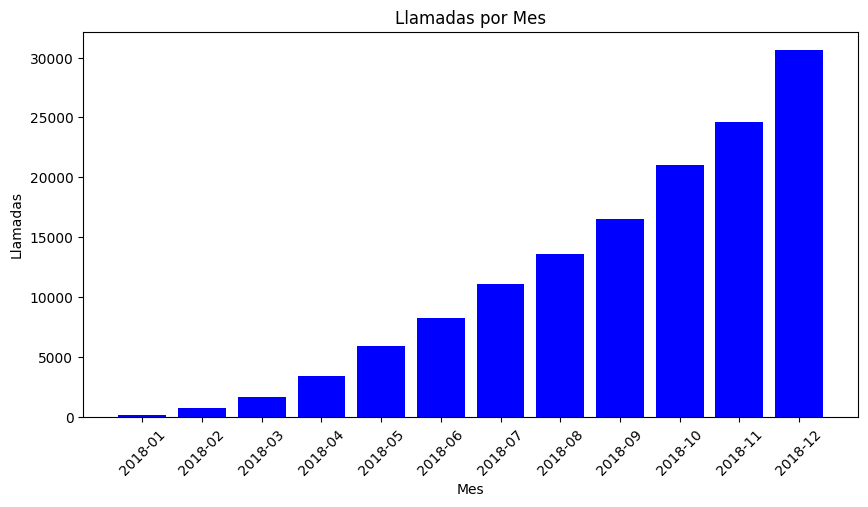

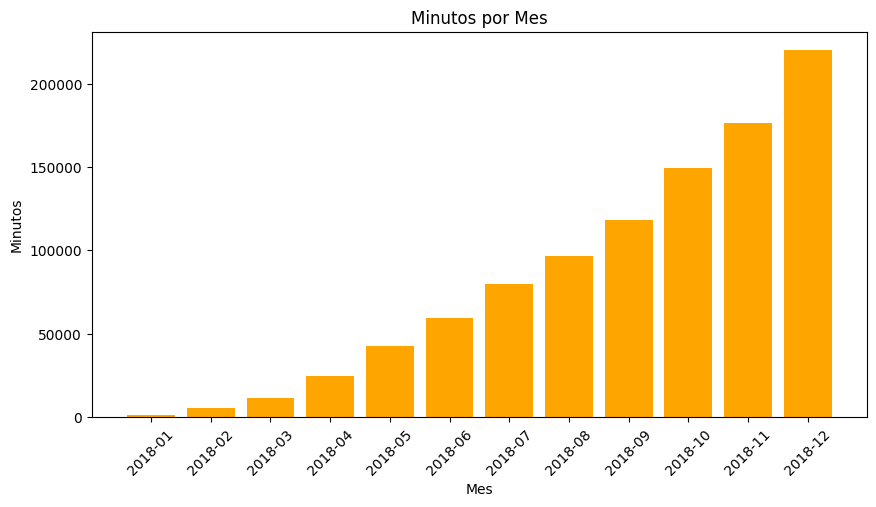

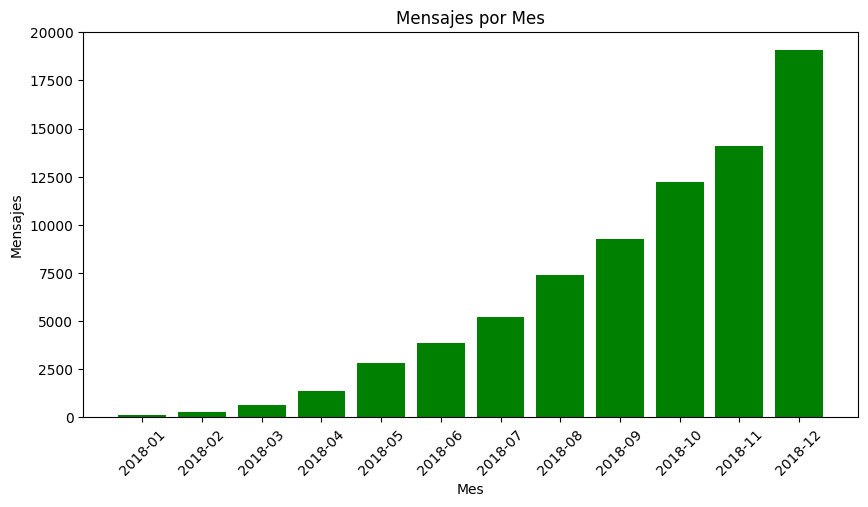

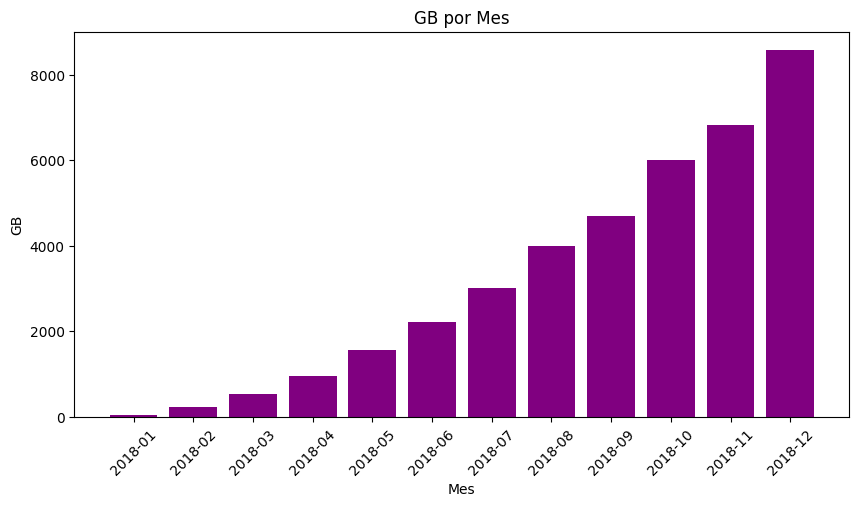

In [90]:

import matplotlib.pyplot as plt

# totales por mes
llamadas_mes = datos_mensuales.groupby('month')['num_calls'].sum()
minutos_mes = datos_mensuales.groupby('month')['minutes_used'].sum()
mensajes_mes = datos_mensuales.groupby('month')['num_messages'].sum()
gb_mes = datos_mensuales.groupby('month')['gb_used'].sum()

# Llamadas
plt.figure(figsize=(10, 5))
plt.bar(llamadas_mes.index.astype(str), llamadas_mes.values, color='blue')
plt.title('Llamadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Llamadas')
plt.xticks(rotation=45)
plt.show()

#  Minutos
plt.figure(figsize=(10, 5))
plt.bar(minutos_mes.index.astype(str), minutos_mes.values, color='orange')
plt.title('Minutos por Mes')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.xticks(rotation=45)
plt.show()

#  Mensajes
plt.figure(figsize=(10, 5))
plt.bar(mensajes_mes.index.astype(str), mensajes_mes.values, color='green')
plt.title('Mensajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes')
plt.xticks(rotation=45)
plt.show()

# GB
plt.figure(figsize=(10, 5))
plt.bar(gb_mes.index.astype(str), gb_mes.values, color='purple')
plt.title('GB por Mes')
plt.xlabel('Mes')
plt.ylabel('GB')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Añade la información de la tarifa

# agrego el plan de cada usuario
datos_mensuales = datos_mensuales.merge(users[['user_id', 'plan']], on='user_id', how='left')

# agrego la información de las tarifas
datos_mensuales = datos_mensuales.merge(plans, left_on='plan', right_on='plan_name', how='left')

print("Datos mensuales con información de tarifas:")
print(datos_mensuales.head(10))
print(f"Columnas: {list(datos_mensuales.columns)}")


Datos mensuales con información de tarifas:
   user_id    month  num_calls  minutes_used  num_messages  gb_used      plan  \
0     1000  2018-12       16.0         124.0          11.0      2.0  ultimate   
1     1001  2018-08       27.0         182.0          30.0      7.0      surf   
2     1001  2018-09       49.0         315.0          44.0     14.0      surf   
3     1001  2018-10       65.0         393.0          53.0     22.0      surf   
4     1001  2018-11       64.0         426.0          36.0     19.0      surf   
5     1001  2018-12       56.0         412.0          44.0     19.0      surf   
6     1002  2018-10       11.0          59.0          15.0      7.0      surf   
7     1002  2018-11       55.0         386.0          32.0     19.0      surf   
8     1002  2018-12       47.0         384.0          41.0     15.0      surf   
9     1003  2018-12      149.0        1104.0          50.0     27.0      surf   

   messages_included  mb_per_month_included  minutes_included  \

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Correcto el uso del merge tipo outer, esto evita que se pierdan datos de usuarios.

</div>

In [92]:
# Calcula el ingreso mensual por cada usuario

#Calculo el valor de ingreso por los que se pasaron del limite de sus planes(minutos, mensajes y gb)
datos_mensuales['minutos_extra'] = (datos_mensuales['minutes_used'] - datos_mensuales['minutes_included']).clip(lower=0)
datos_mensuales['mensajes_extra'] = (datos_mensuales['num_messages'] - datos_mensuales['messages_included']).clip(lower=0)
datos_mensuales['gb_extra'] = (datos_mensuales['gb_used'] - datos_mensuales['mb_per_month_included']/1024).clip(lower=0)

#Calculo el ingreso total = tarifa base + cargos por excedentes
datos_mensuales['ingreso_mensual'] = (
    datos_mensuales['usd_monthly_fee'] +
    datos_mensuales['minutos_extra'] * datos_mensuales['usd_per_minute'] +
    datos_mensuales['mensajes_extra'] * datos_mensuales['usd_per_message'] +
    datos_mensuales['gb_extra'] * datos_mensuales['usd_per_gb']
)

print(datos_mensuales[['user_id', 'month', 'plan', 'ingreso_mensual']].head(20))
print(f"Ingreso promedio: ${datos_mensuales['ingreso_mensual'].mean():.2f}")


    user_id    month      plan  ingreso_mensual
0      1000  2018-12  ultimate            70.00
1      1001  2018-08      surf            20.00
2      1001  2018-09      surf            20.00
3      1001  2018-10      surf            90.09
4      1001  2018-11      surf            60.00
5      1001  2018-12      surf            60.00
6      1002  2018-10      surf            20.00
7      1002  2018-11      surf            60.00
8      1002  2018-12      surf            20.00
9      1003  2018-12      surf           158.12
10     1004  2018-05      surf            20.00
11     1004  2018-06      surf            80.00
12     1004  2018-07      surf           110.00
13     1004  2018-08      surf           150.00
14     1004  2018-09      surf            60.00
15     1004  2018-10      surf            20.00
16     1004  2018-11      surf            90.00
17     1004  2018-12      surf            80.00
18     1005  2018-12      surf            40.00
19     1006  2018-11  ultimate          

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>


Muy buen trabajo! El cálculo del revenue mensual por usuario está correcto

</div>

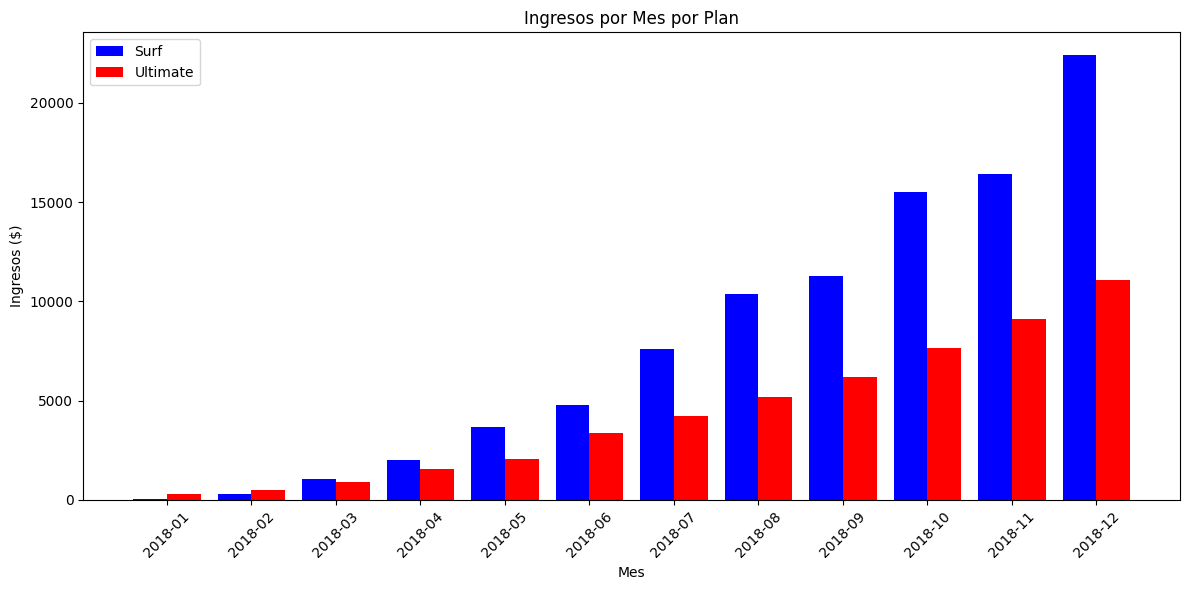

Ingresos por mes y plan:
month    plan    
2018-01  surf           40.00
         ultimate      280.00
2018-02  surf          309.57
         ultimate      490.00
2018-03  surf         1056.65
         ultimate      896.00
2018-04  surf         2035.53
         ultimate     1533.00
2018-05  surf         3667.37
         ultimate     2051.00
2018-06  surf         4779.80
         ultimate     3367.00
2018-07  surf         7583.56
         ultimate     4242.00
2018-08  surf        10356.85
         ultimate     5173.00
2018-09  surf        11304.67
         ultimate     6195.00
2018-10  surf        15504.83
         ultimate     7665.00
2018-11  surf        16415.21
         ultimate     9107.00
2018-12  surf        22437.14
         ultimate    11067.00
Name: ingreso_mensual, dtype: float64


In [93]:
# Calculo ingresos por mes por plan para compararlos

import matplotlib.pyplot as plt


ingresos_mes_plan = datos_mensuales.groupby(['month', 'plan'])['ingreso_mensual'].sum()


surf_ingresos = ingresos_mes_plan.xs('surf', level='plan')
ultimate_ingresos = ingresos_mes_plan.xs('ultimate', level='plan')


plt.figure(figsize=(12, 6))
x = range(len(surf_ingresos))
plt.bar(x, surf_ingresos.values, width=0.4, label='Surf', color='blue', align='center')
plt.bar([i+0.4 for i in x], ultimate_ingresos.values, width=0.4, label='Ultimate', color='red', align='center')
plt.title('Ingresos por Mes por Plan')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($)')
plt.xticks([i+0.2 for i in x], surf_ingresos.index.astype(str), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("Ingresos por mes y plan:")
print(ingresos_mes_plan)

## Estudia el comportamiento de usuario

### Llamadas

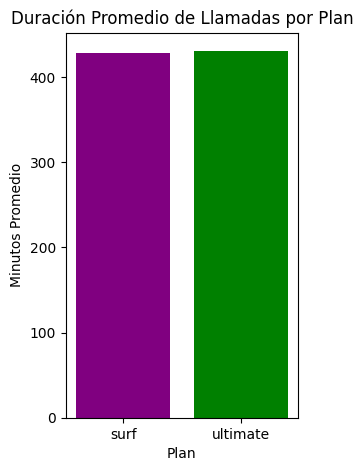

Minutos promedio por plan:
plan
surf        428.749523
ultimate    430.450000
Name: minutes_used, dtype: float64


In [94]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

import matplotlib.pyplot as plt

duracion_promedio = datos_mensuales.groupby('plan')['minutes_used'].mean()

plt.figure(figsize=(3, 5))
plt.bar(duracion_promedio.index, duracion_promedio.values, color=['purple', 'green'])
plt.title('Duración Promedio de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos Promedio')
plt.show()

print("Minutos promedio por plan:")
print(duracion_promedio)


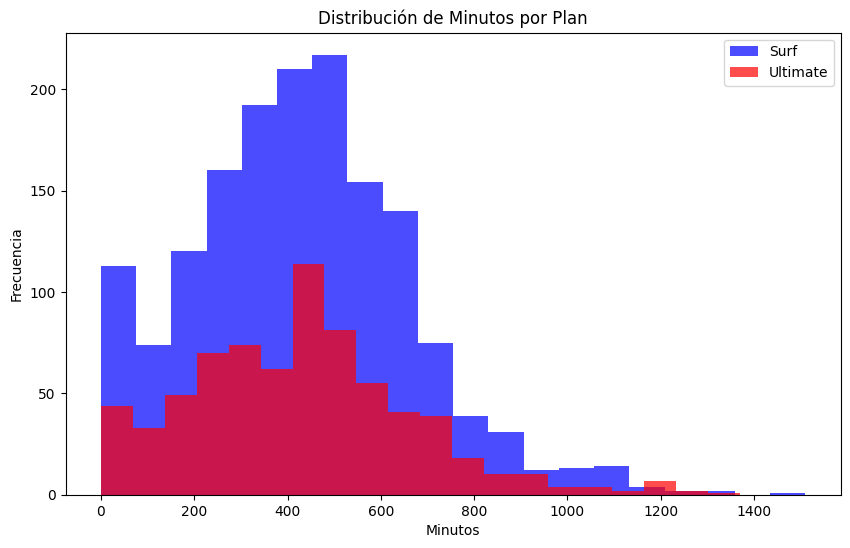

In [95]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

import matplotlib.pyplot as plt

surf_minutos = datos_mensuales[datos_mensuales['plan'] == 'surf']['minutes_used']
ultimate_minutos = datos_mensuales[datos_mensuales['plan'] == 'ultimate']['minutes_used']

plt.figure(figsize=(10, 6))
plt.hist(surf_minutos, bins=20, alpha=0.7, label='Surf', color='blue')
plt.hist(ultimate_minutos, bins=20, alpha=0.7, label='Ultimate', color='red')
plt.title('Distribución de Minutos por Plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [96]:
# Calcula la media y la varianza de la duración mensual de llamadas.

media_minutos = datos_mensuales['minutes_used'].mean()

varianza_minutos = datos_mensuales['minutes_used'].var()

desviacion_minutos = datos_mensuales['minutes_used'].std()

print("Estadísticas de minutos mensuales:")
print(f"Media: {media_minutos:.2f} minutos")
print(f"Varianza: {varianza_minutos:.2f}")
print(f"Desviación estándar: {desviacion_minutos:.2f} minutos")


Estadísticas de minutos mensuales:
Media: 429.28 minutos
Varianza: 55847.18
Desviación estándar: 236.32 minutos


In [97]:
estadisticas_plan = datos_mensuales.groupby('plan')['minutes_used'].agg(['mean', 'var', 'std'])

print("Estadísticas de minutos por plan:")
print(estadisticas_plan)

Estadísticas de minutos por plan:
                mean           var         std
plan                                          
surf      428.749523  54968.279461  234.453150
ultimate  430.450000  57844.464812  240.508762


<Figure size 1000x1200 with 0 Axes>

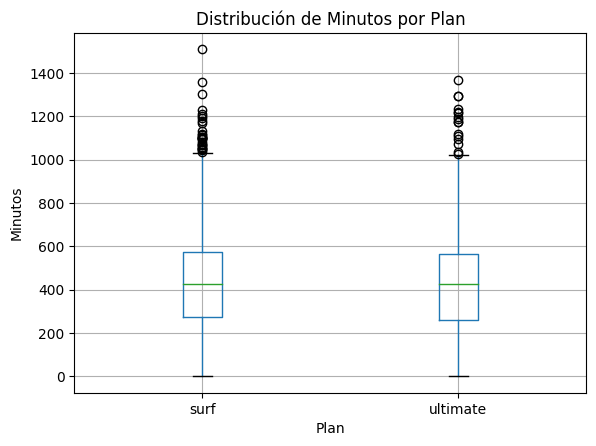

In [98]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 12))
datos_mensuales.boxplot(column='minutes_used', by='plan')
plt.title('Distribución de Minutos por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.suptitle('')  
plt.show()



Los 2 planes en cuanto a sus datos estaditicos parecen tener un comportamiento muy similar:
- El promedio de minutos utilizado es casi el mismo
- La dispersion es muy similar, lo que indica que en los 2 planes hay usuarios que usan muy poco y otros que usan mucho
- Sin embargo los usuarios de Surf estan muy cerca del limite de minutos (500) y esto hace que los que se pasen deban pagar extras, y las extras de este plan son mas costosas que las de Ultimate
- Mientras tanto los usuarios de Ultimate estan casi 1500 min por debajo (segun el promedio) y estan pagando casi 4 veces por un plan por el cual no consumen todo lo que tienen, por eso muy pocos usuarios se pasan y ademas los que se pasan tienen una tarifa en este plan mucho mas economica por min adicional comparado con Surf.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Excelente trabajo hecho con los análisis de distribución y del cálculo de media y varianza. Estos nos indican que ambos planes son similares en consumo de llamadas si los vemos en un total de la data, aunque a lo largo de los meses han tenido diferencias que disminuyeron en los meses recientes.

</div>

### Mensajes

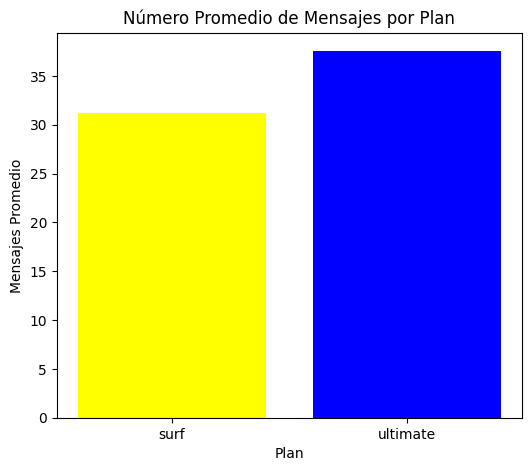

Mensajes promedio por plan:
plan
surf        31.159568
ultimate    37.551389
Name: num_messages, dtype: float64


In [99]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

import matplotlib.pyplot as plt

mensajes_promedio = datos_mensuales.groupby('plan')['num_messages'].mean()

plt.figure(figsize=(6, 5))
plt.bar(mensajes_promedio.index, mensajes_promedio.values, color=['yellow', 'blue'])
plt.title('Número Promedio de Mensajes por Plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes Promedio')
plt.show()

print("Mensajes promedio por plan:")
print(mensajes_promedio)



In [100]:
estadisticas_plan = datos_mensuales.groupby('plan')['num_messages'].agg(['mean', 'var', 'std'])

print("Estadísticas de mensajes por plan:")
print(estadisticas_plan)

Estadísticas de mensajes por plan:
               mean          var        std
plan                                       
surf      31.159568  1126.724522  33.566717
ultimate  37.551389  1208.756744  34.767179


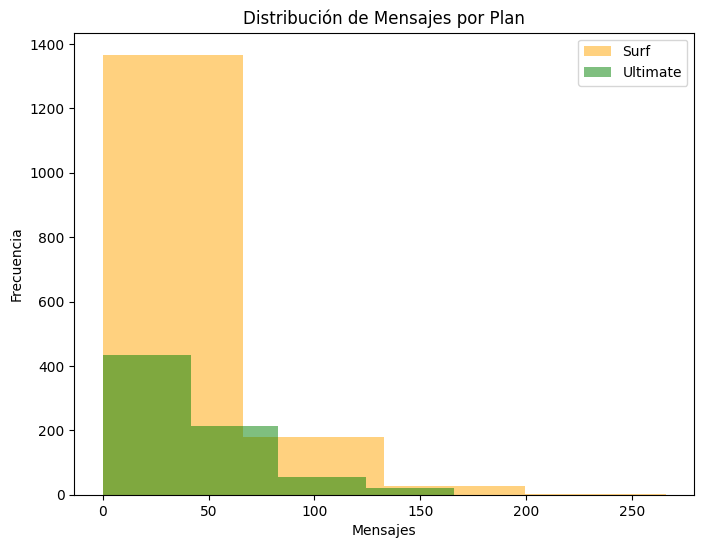

In [101]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

import matplotlib.pyplot as plt

surf_mensajes = datos_mensuales[datos_mensuales['plan'] == 'surf']['num_messages']
ultimate_mensajes = datos_mensuales[datos_mensuales['plan'] == 'ultimate']['num_messages']

plt.figure(figsize=(8, 6))
plt.hist(surf_mensajes, bins=4, alpha=0.5, label='Surf', color='orange')
plt.hist(ultimate_mensajes, bins=4, alpha=0.5, label='Ultimate', color='green')
plt.title('Distribución de Mensajes por Plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<Figure size 1000x1200 with 0 Axes>

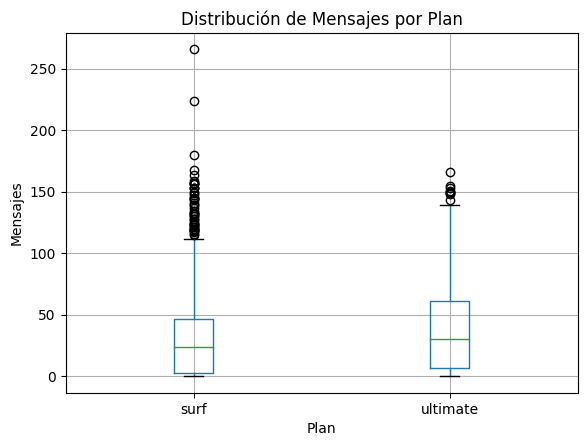

In [102]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de mensajes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 12))
datos_mensuales.boxplot(column='num_messages', by='plan')
plt.title('Distribución de Mensajes por Plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes')
plt.suptitle('')  
plt.show()


- La mayoria de los usuarios envian entre 0 y 50 mensajes 
- Hay bastantes valores atipicos, con algunos usuarios que envian mas de 100 mensajes para el caso del plan Surf
- Hay un sesgo a la derecha, lo que significa que la mayoria de los usuarios envian mas mensajes del promedio
- La mediana esta en la base de la caja y los valores estadisticos de los 2 planes son muy similares
- Las 2 cajas muestran una distribución similar, pero el plan ultimate tiene usuarios enviando por encima de 140 mensajes

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Excelente, muy bien con la comparación del consumo de mensajes entre los planes. Vemos que se diferencian más que las llamadas.



</div>

### Internet

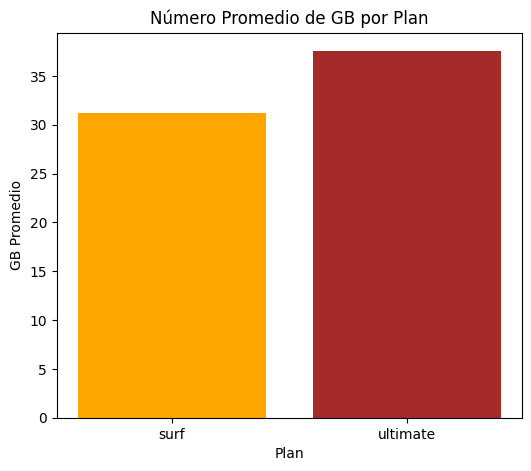

GB promedio por plan:
plan
surf        16.670693
ultimate    17.306944
Name: gb_used, dtype: float64


In [103]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

import matplotlib.pyplot as plt

internet_promedio = datos_mensuales.groupby('plan')['gb_used'].mean()

plt.figure(figsize=(6, 5))
plt.bar(mensajes_promedio.index, mensajes_promedio.values, color=['orange', 'brown'])
plt.title('Número Promedio de GB por Plan')
plt.xlabel('Plan')
plt.ylabel('GB Promedio')
plt.show()

print("GB promedio por plan:")
print(internet_promedio)


In [104]:
estadisticas_plan = datos_mensuales.groupby('plan')['gb_used'].agg(['mean', 'var', 'std'])

print("Estadísticas de GB por plan:")
print(estadisticas_plan)

Estadísticas de GB por plan:
               mean       var       std
plan                                   
surf      16.670693  61.58360  7.847522
ultimate  17.306944  58.83055  7.670108


- Los 2 planes cuentan con consumos similares en Gb, quiere decir que Surf, que cuenta solo con 1 Gb de consumo en su plan esta superando 15 veces el consumo del plan, pagando de mas en Gb extra
- Por otro lado los usuarios con plan Ultimate que cuentan con 30 Gb estan consumiento tal vez un poco mas de la mitad, desperdiciando el resto de las Gb habilitadas en su plan , perdiendo dinero.
- 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Correcto. El consumo de internet entre planes se ve muy similar.



</div>

## Ingreso

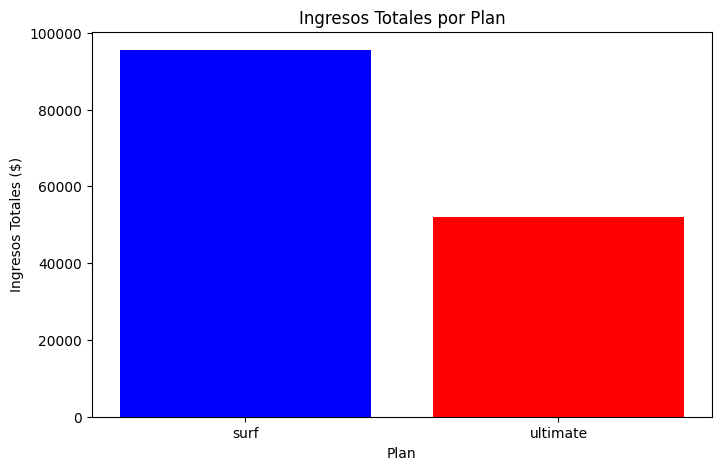

In [105]:
# Comprara el ingreso al mes por plan

import matplotlib.pyplot as plt

# ingresos totales por plan
ingresos_totales = datos_mensuales.groupby('plan')['ingreso_mensual'].sum()

plt.figure(figsize=(8, 5))
plt.bar(ingresos_totales.index, ingresos_totales.values, color=['blue', 'red'])
plt.title('Ingresos Totales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Totales ($)')
plt.show()

In [106]:
estadisticas_plan = datos_mensuales.groupby('plan')['ingreso_mensual'].agg(['mean', 'var', 'std'])

print("Estadísticas de ingreso por plan:")
print(estadisticas_plan)

Estadísticas de ingreso por plan:
               mean          var        std
plan                                       
surf      60.706408  3067.835152  55.388042
ultimate  72.313889   129.848486  11.395108


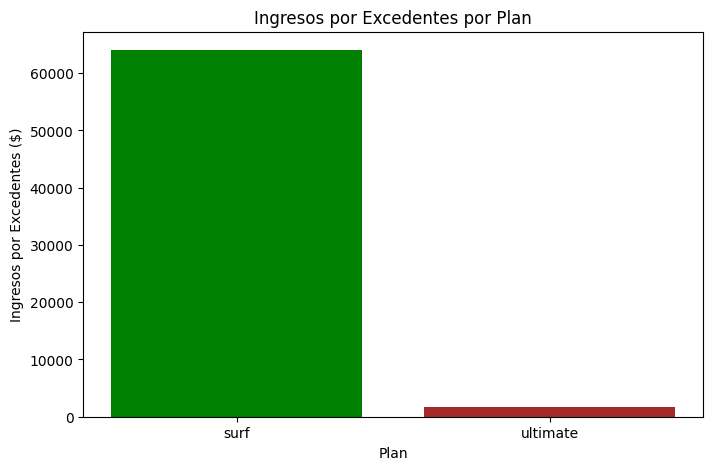

Ingresos por excedentes:
plan
surf        64031.18
ultimate     1666.00
Name: ingresos_excedentes, dtype: float64


In [107]:
# Calculo el ingreso por excedentes de cada plan

datos_mensuales['ingresos_excedentes'] = datos_mensuales['ingreso_mensual'] - datos_mensuales['usd_monthly_fee']

excedentes_plan = datos_mensuales.groupby('plan')['ingresos_excedentes'].sum()

plt.figure(figsize=(8, 5))
plt.bar(excedentes_plan.index, excedentes_plan.values, color=['green', 'brown'])
plt.title('Ingresos por Excedentes por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos por Excedentes ($)')
plt.show()

print("Ingresos por excedentes:")
print(excedentes_plan)

CONCLUSIONES: 
- Segun las estadisticas se puede evidenciar que en promedio, los usuarios de Ultimate generan $11.60 más de ingresos mensuales que los de Surf.
- Se identifica una varianza alta, lo que significa que hay mucha diferencia entre usuarios.

Analizando uno a uno:

Usuarios de Surf:

- Tienen ingresos muy variables, no hay una tendencia 100% definida
- No tienen un comportamiento de uso predecible

Usuarios de Ultimate:

- Tienen ingresos más estables, con una desviacion menor
- La mayoria estan muy cerca de la tarifa base que son sus 70 usd / mes
- Es decir que son mas predecibels en su comportamiento e ingreso


<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Bien hecho. Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no

</div>

## Prueba las hipótesis estadísticas

In [108]:
# Prueba las hipótesis
# Hipotesis: [Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

from scipy import stats

print("PRUEBA DE HIPÓTESIS")
print("H0: Los ingresos promedio de Surf y Ultimate son iguales")
print("H1: Los ingresos promedio de Surf y Ultimate son diferentes")
print()

# Separo ingresos por plan
surf_ingresos = datos_mensuales[datos_mensuales['plan'] == 'surf']['ingreso_mensual']
ultimate_ingresos = datos_mensuales[datos_mensuales['plan'] == 'ultimate']['ingreso_mensual']

# promedios de cada plan
print(f"Ingreso promedio Surf: ${surf_ingresos.mean():.2f}")
print(f"Ingreso promedio Ultimate: ${ultimate_ingresos.mean():.2f}")
print()

# Nivel de significancia
alfa = 0.05
print(f"Nivel de significancia (alfa): {alfa}")
print()

# Prueba t para muestras independientes
estadistico, p_valor = stats.ttest_ind(surf_ingresos, ultimate_ingresos)

print(f"Estadístico t: {estadistico:.4f}")
print(f"Valor p: {p_valor:.4f}")
print()

# Decisión
if p_valor < alfa:
    print("DECISIÓN: Rechazamos H0")
    print("CONCLUSIÓN: Los ingresos promedio SÍ son significativamente diferentes")
else:
    print("DECISIÓN: No rechazamos H0")
    print("CONCLUSIÓN: No hay evidencia de diferencia significativa en los ingresos")


PRUEBA DE HIPÓTESIS
H0: Los ingresos promedio de Surf y Ultimate son iguales
H1: Los ingresos promedio de Surf y Ultimate son diferentes

Ingreso promedio Surf: $60.71
Ingreso promedio Ultimate: $72.31

Nivel de significancia (alfa): 0.05

Estadístico t: -5.5689
Valor p: 0.0000

DECISIÓN: Rechazamos H0
CONCLUSIÓN: Los ingresos promedio SÍ son significativamente diferentes


In [109]:
# Prueba las hipótesis :[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

from scipy import stats

# identificar NY-NJ
datos_mensuales_ciudad = datos_mensuales.merge(users[['user_id', 'city']], on='user_id', how='left')
datos_mensuales_ciudad['es_ny_nj'] = datos_mensuales_ciudad['city'].str.contains('NY|NJ', case=False, na=False)

# Hipótesis
print("PRUEBA DE HIPÓTESIS: NY-NJ vs OTRAS REGIONES")
print("H0: El ingreso promedio de NY-NJ es igual al de otras regiones")
print("H1: El ingreso promedio de NY-NJ es diferente al de otras regiones")
print()

#ingresos por región
ny_nj_ingresos = datos_mensuales_ciudad[datos_mensuales_ciudad['es_ny_nj'] == True]['ingreso_mensual']
otras_ingresos = datos_mensuales_ciudad[datos_mensuales_ciudad['es_ny_nj'] == False]['ingreso_mensual']

# promedios
print(f"Ingreso promedio NY-NJ: ${ny_nj_ingresos.mean():.2f}")
print(f"Ingreso promedio Otras regiones: ${otras_ingresos.mean():.2f}")
print()

# significancia
alfa = 0.05
print(f"Nivel de significancia (alfa): {alfa}")
print()

# Prueba t
estadistico, p_valor = stats.ttest_ind(ny_nj_ingresos, otras_ingresos)

print(f"Estadístico t: {estadistico:.4f}")
print(f"Valor p: {p_valor:.4f}")
print()

# Decisión
if p_valor < alfa:
    print("DECISIÓN: Rechazamos H0")
    print("CONCLUSIÓN: Los ingresos SÍ son significativamente diferentes")
else:
    print("DECISIÓN: No rechazamos H0")
    print("CONCLUSIÓN: No hay evidencia de diferencia significativa")




PRUEBA DE HIPÓTESIS: NY-NJ vs OTRAS REGIONES
H0: El ingreso promedio de NY-NJ es igual al de otras regiones
H1: El ingreso promedio de NY-NJ es diferente al de otras regiones

Ingreso promedio NY-NJ: $63.37
Ingreso promedio Otras regiones: $64.64

Nivel de significancia (alfa): 0.05

Estadístico t: -0.5459
Valor p: 0.5852

DECISIÓN: No rechazamos H0
CONCLUSIÓN: No hay evidencia de diferencia significativa


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

## Conclusión general

Segun la prueba de hipotesis de la linea 60, la gran CONCLUSIÓN: Los ingresos promedio de los 2 planes Surf y Ultimate SÍ son significativamente diferentes, y de acuerdo al analisis de datos y graficas diseñado en este cuaderno se puede identificar el motivo, el cual se describe a continuacion basado en cada plan:

Plan Surf ($20 base):
- Los usuarios piensan que están ahorrando dinero
- Pero terminan pagando MÁS que Ultimate por los cargos adicionales
- Promedio real: $60.71, es decir $40 mas que su plan inicial
- Con alta variabilidad: algunos pagan muchísimo más
- Los usuarios de Surf, caen en una trampa visual de numero, piensan que van a pagar menos cuando terminan pagando mas y con menos beneficios vs el plan Ultimate

Plan Ultimate ($70 base):
- Parece más caro al principio por ser casi 4 veces mas caro que el plan Surf
- Pero en realidad es más predecible y a realmente más economico
- Promedio real: $72.31, solo 2 dolares por encima del plan real
- Es un plan mas estable y con menos variabilidad en el costo de la factura mes a mes, es decir sin sorpresas.


RECOMENDACION:

- a los usuarios de Surf pasarse al plan Ultimate, ya que van a tener mas beneficios y menos variacion en el pago mensual de su factura (saben que presupuesto guardar)

** En cuanto a la gran conclusion del área comercial, de cual de los 2 planes genera mas ingresos :

- A hoy el plan Surf, de acuerdo a las graficas del aparato "1.14. Ingreso", es el que genera mas ingresos, y ésto es debido a que a pesar de su tarifa base mucho menor, tiene cargo por minuto, mensaje y GB excedente mucho mas costosa que el plan Ultimate, lo que eleva notoriamente el ingreso mensual.
- Adicional se recomienda que de acuerdo a la grafica  de la linea 47, el consumo tiene un crecimiento exponencial importante y notorio a partir del mes de Abril, teniendo un alza significativa en Diciembre. Lo cual puede deberse a nuevos inscritos o a mayor consumo en el segundo semestre del año, y podria verse beneficiado con mayor publicidad y promociones atractivas para los usuarios.
- Con lo anterior Diciembre es el mes de mayor consumo , y alli se deberian desplegar estrategias comerciales significativas y notorias para ayudar al cierre de año efectivo de la compañia, seguramente por la temporada Decembrina, festividades, vacaciones y demas el consumo aumenta y se debe sacar provecho de éso.


Gracias!  y atenta a sus comentarios.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor           </b> <a class="tocSkip"></a>

¡Muy buenas conclusiones! Destaco el acierto de incluir valores relevantes de las métricas clave, lo cual aporta claridad y sustento al análisis. Además, resumiste de forma efectiva los hallazgos principales. ¡Buen trabajo!

Como consejo adicional, cuando escribes `$` en una celda markdown, se activa el modo matemático LaTeX, por ello es que cuando usas ese símbolo el text se ve diferente. Para evitar esto, usa `\$` y así no tendrás problemas con el símbolo \$
    
</div>